In [11]:
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [12]:
HERE = Path().parent

# Define custom colors
red = "#962428"
yellow = "#fefdc5"
blue = "#374b99"
green = "#7db9ab"

In [13]:
X = pd.read_csv(f"{HERE}/donnees/X.txt", sep=" ", header=None)
APPART = pd.read_csv(f"{HERE}/donnees/APPART.txt", sep=" ", header=None)
JOUR = pd.read_csv(f"{HERE}/donnees/JOUR.txt", sep=" ", header=None)

In [14]:
X[:5]

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-1.786785,-1.759306,-1.731826,-1.657497,-1.504801,-1.303554,-1.099353,-0.939600,-0.834307,-0.642136,...,1.796293,1.746644,1.617929,1.374530,0.991029,0.564313,0.200768,-0.077526,-0.276923,-0.433195
1,-0.394478,-0.634234,-0.873990,-1.012224,-0.992106,-0.935577,-0.966903,-1.040886,-1.074217,-1.000619,...,0.835603,0.970470,1.115326,1.143106,0.943505,0.560883,0.094956,-0.287792,-0.456911,-0.492853
2,-1.216742,-1.395422,-1.574103,-1.741657,-1.879992,-1.943143,-1.897188,-1.784239,-1.650855,-1.485354,...,1.153940,1.267196,1.333831,1.347890,1.308287,1.199404,1.006899,0.736046,0.401007,0.031883
3,-0.796512,-1.189678,-1.582845,-1.883616,-2.029875,-2.080617,-2.097591,-2.032449,-1.835092,-1.558510,...,1.156785,1.309893,1.248746,1.033263,0.756840,0.522058,0.398940,0.318105,0.197855,0.046630
4,-0.077746,-0.709023,-1.340300,-1.873472,-2.216010,-2.297673,-2.089215,-1.703073,-1.269871,-0.851312,...,1.526477,1.661399,1.647645,1.470649,1.130163,0.676563,0.177488,-0.281004,-0.634296,-0.921962


## Transformation du tableau X en un tableau de données catégorielles

L’objectif de cette partie est de regrouper les lignes du tableau X en K classes, puis, à partir des labels des classes, de transformer les données journalières initiales (X) en un tableau de données catégorielles Y (100 lignes et 91 colonnes).


X (en ligne les jours tout appartement confondu, en colonne chaque pas de 30 min)

In [15]:
# couleur 
red = "#962428"
yellow = "#fefdc5"
blue = "#374b99"
green = "#7db9ab"

### KMeans

In [16]:
from sklearn.cluster import KMeans

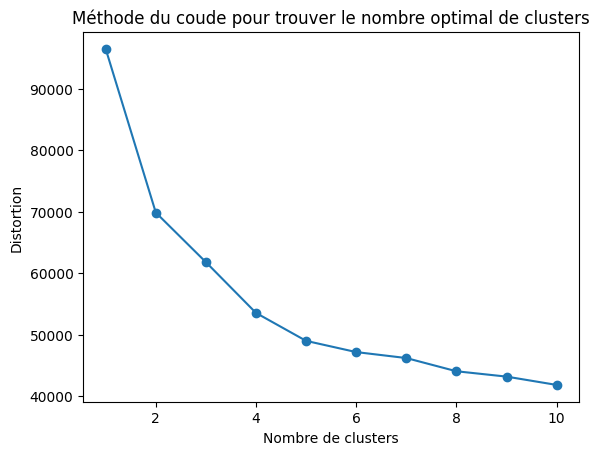

In [17]:
# Méthode du coude pour trouver le nombre optimal de clusters
distortions = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Visualisation
plt.plot(K_range, distortions, marker='o')
plt.title('Méthode du coude pour trouver le nombre optimal de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Distortion')
plt.show()

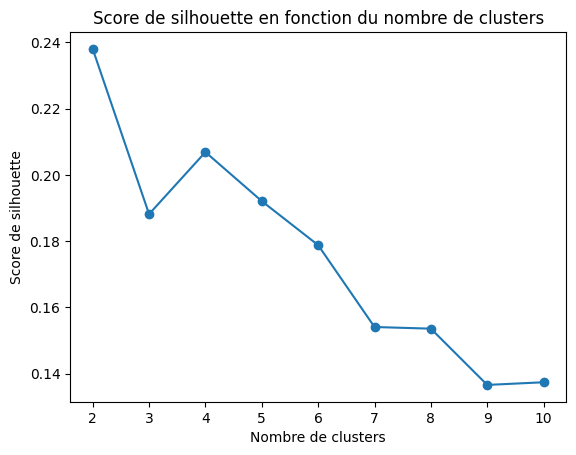

In [18]:
# dessiner le score de silhouette en fonction du nombre de clusters
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Visualisation
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Score de silhouette en fonction du nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.show()

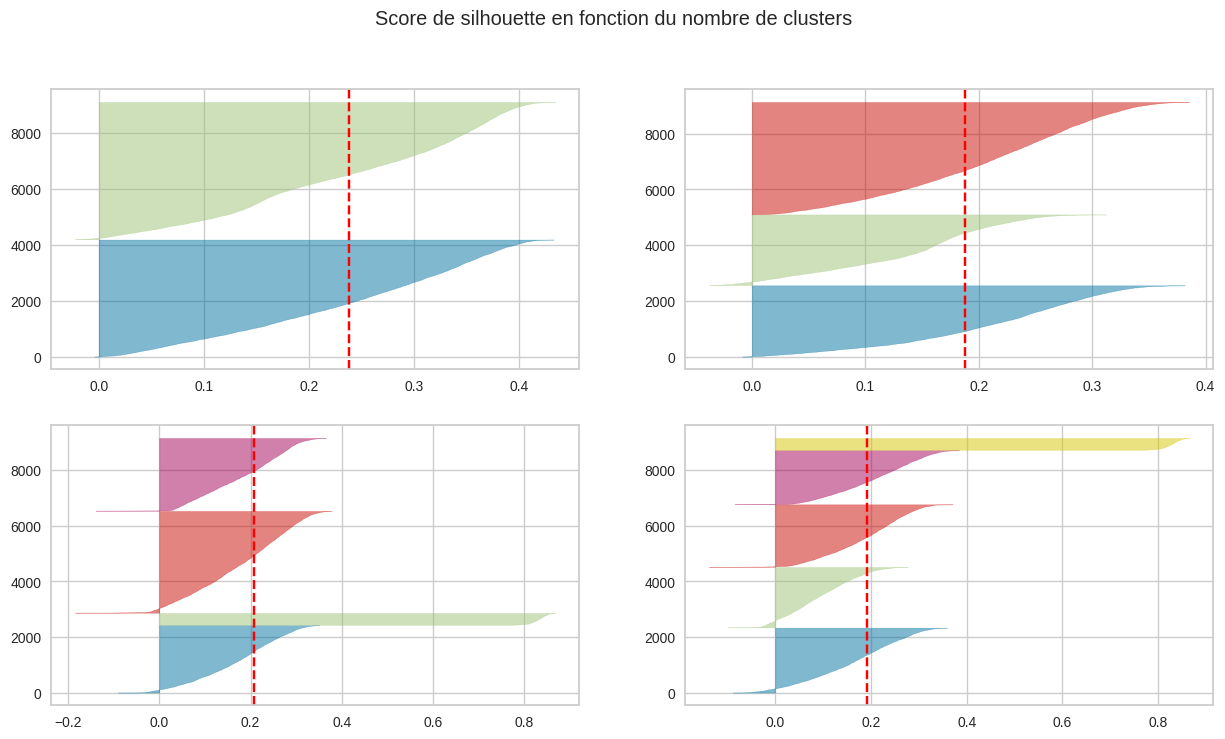

In [19]:
# visualisation du score de silhouette en fonction du nombre de clusters
# Plus precisement la densité des clusters
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15, 8))
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(X)

plt.suptitle('Score de silhouette en fonction du nombre de clusters')
plt.show()

Le nombre de clusters approprié est 3 car elle montre une proportion plus ou moins équilibré des groupes.

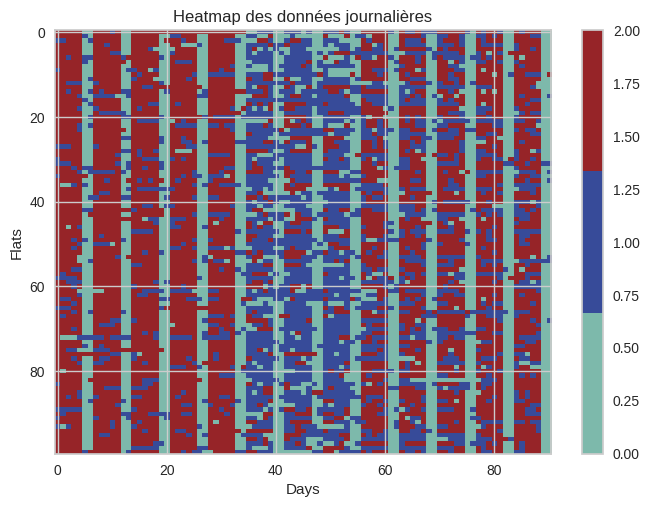

In [21]:
# 
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X)

Y = pd.DataFrame(columns=range(91))
for i in range(100):
    Y.loc[i] = kmeans.labels_[i * 91: (i + 1) * 91]

# Create a colormap with the custom colors
couleurs = ListedColormap([green, blue, red])

plt.imshow(Y, aspect='auto', cmap=couleurs)

# Annotate axes
plt.xlabel('Days')
plt.ylabel('Flats')

plt.colorbar()

plt.title('Heatmap des données journalières')

plt.show()

## Classification des 91 jours en partant du tableau de données catégorielles Y

Text(0.5, 1.0, 'Heatmap des données journalières')

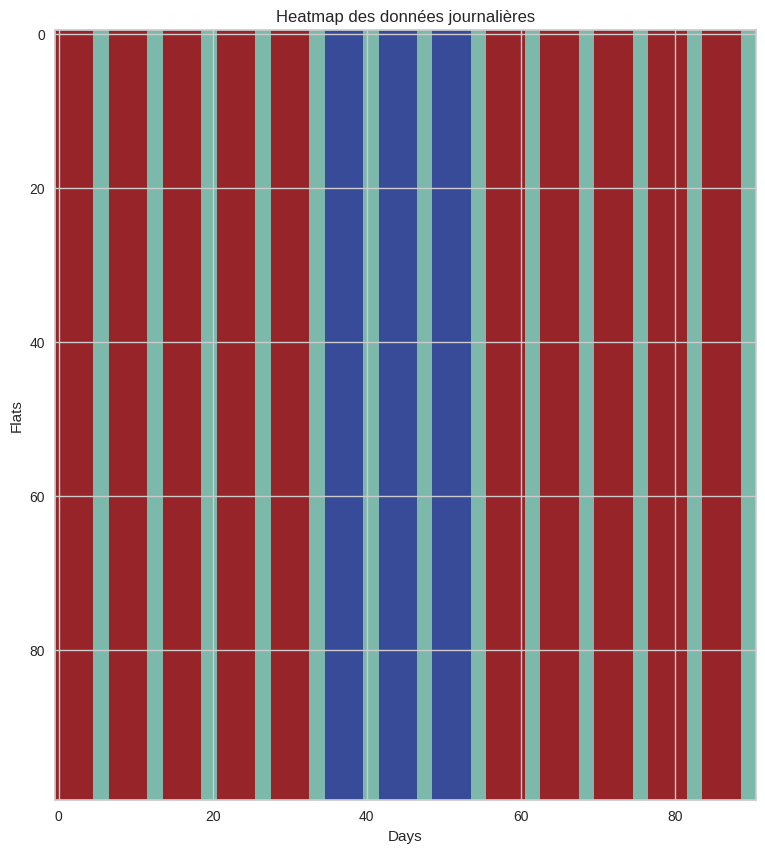

In [22]:
# classification des 91 jours en 3 clusters en utilisant CAH en partant tableau de données catégorielles Y
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Assuming Y is already defined
cah = AgglomerativeClustering(n_clusters=3, linkage='complete')
cah.fit(Y.T)

# Create a colormap with the custom colors
couleurs = ListedColormap([red, green, blue ])

plt.figure(figsize=(20, 10))
plt.imshow(np.tile(cah.labels_, (100, 1)), cmap=couleurs)

# Annotate axes
plt.xlabel('Days')
plt.ylabel('Flats')

plt.title('Heatmap des données journalières')

## Visualisation des 91 jours dans l'espace des 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

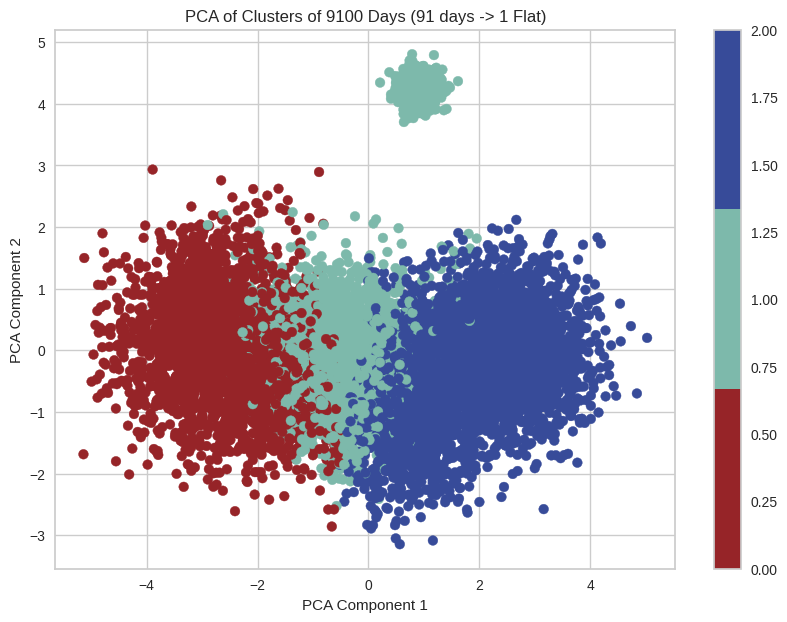

In [72]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)
plt.figure(figsize=(10, 7))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans.labels_, cmap=couleurs)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Clusters of 9100 Days (91 days -> 1 Flat)') 
plt.colorbar()
plt.show()

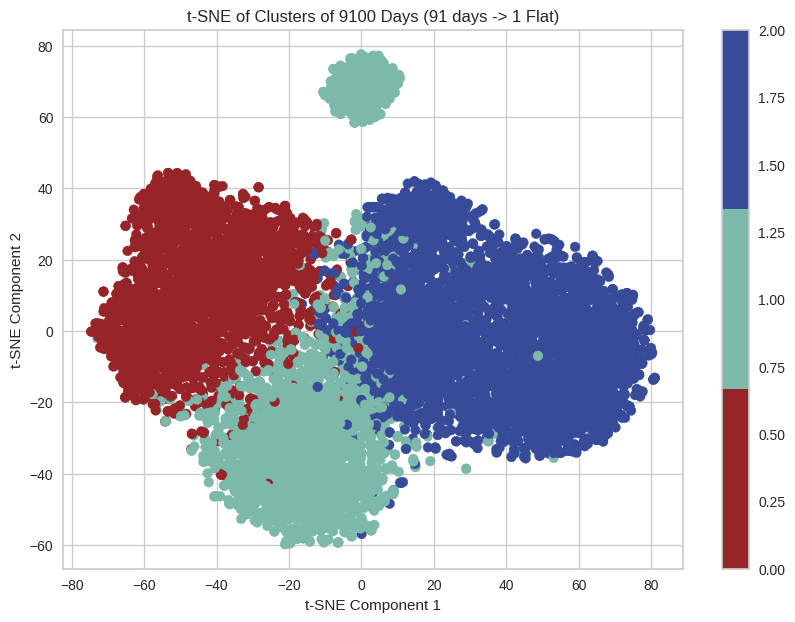

In [73]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap=couleurs)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Clusters of 9100 Days (91 days -> 1 Flat)')
plt.colorbar()
plt.show()

## Visualisation des 91 jours dans l'espace des appartements

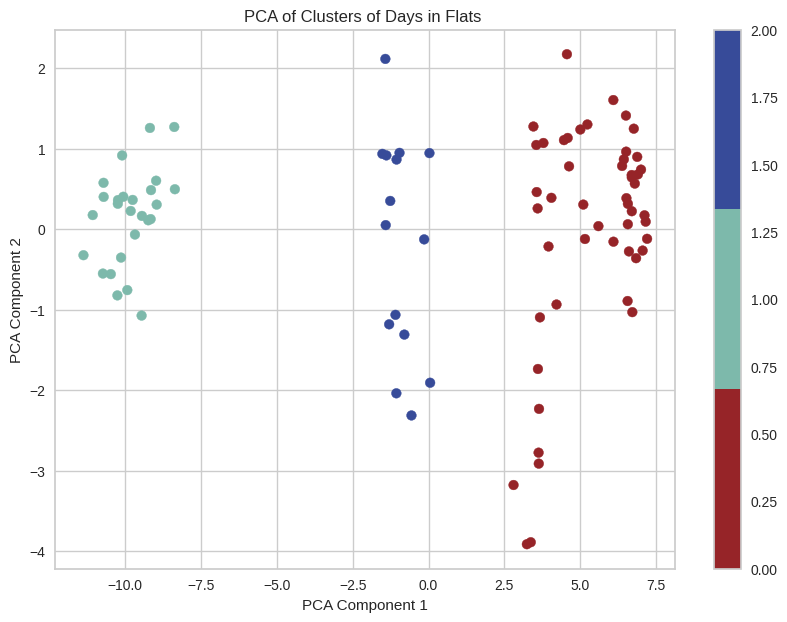

In [25]:
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(Y.T)
plt.figure(figsize=(10, 7))
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=cah.labels_, cmap=couleurs)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Clusters of Days in Flats ') 
plt.colorbar()
plt.show()

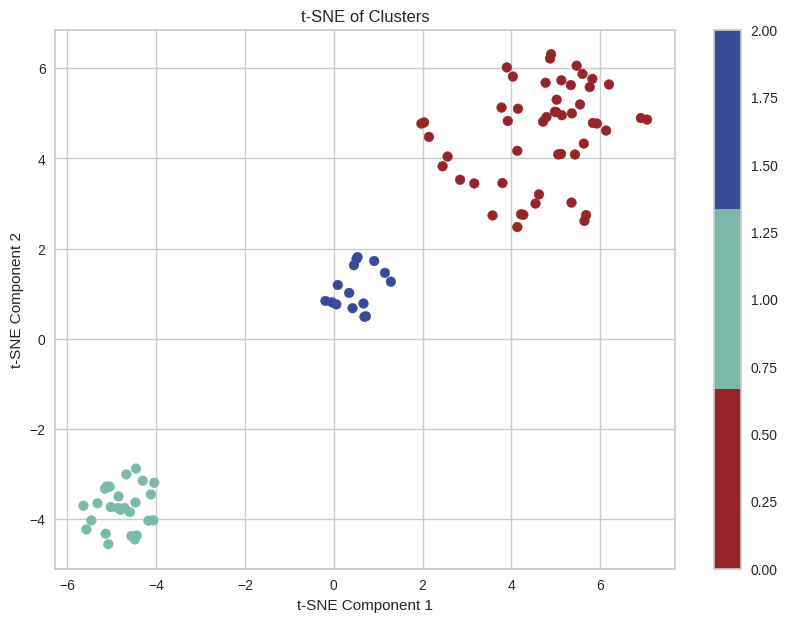

In [27]:
tsne = TSNE(n_components=2, random_state=42)
Y_tsne = tsne.fit_transform(Y.T)
plt.figure(figsize=(10, 7))
plt.scatter(Y_tsne[:, 0], Y_tsne[:, 1], c=cah.labels_, cmap=couleurs)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Clusters')
plt.colorbar()
plt.show()

In [71]:
# dans X recupérer pour tous appartement, les représentants (mean) les jours qui appartiennent au cluster cah.labels_ == 0
#X_appart1 = X.loc[APPART[APPART[0] == 1].index]
#X_appart1_cluster0 = X_appart1[cah.labels_ == 0]
#X_appart1_cluster0.mean()

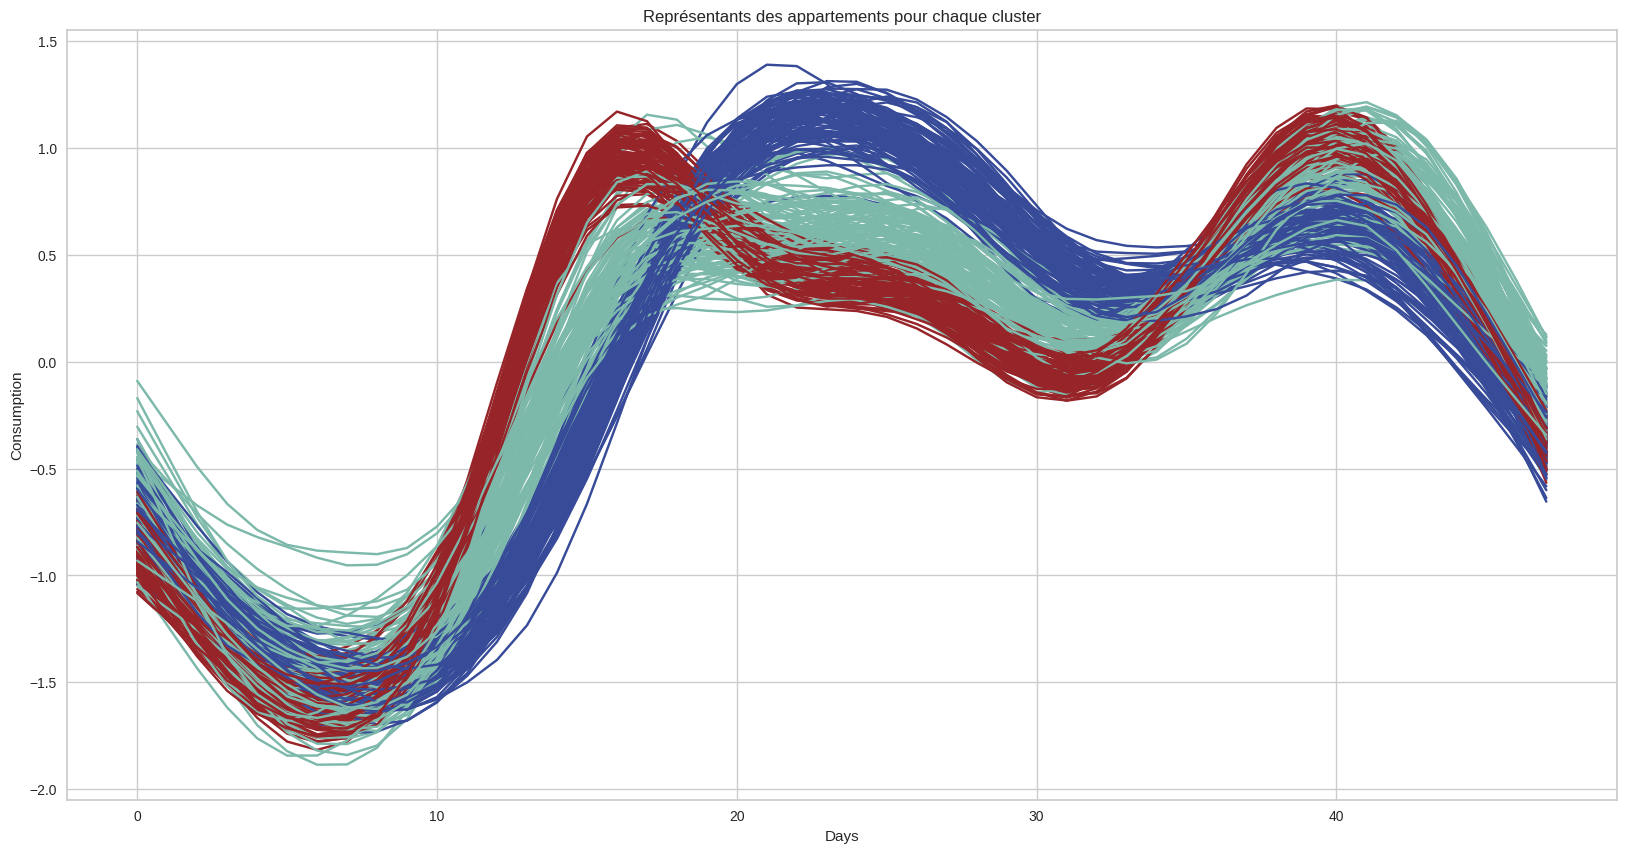

In [64]:
def plot_representatives(X, APPART, labels, n_clusters):
    plt.figure(figsize=(20, 10))
    colors = ['#962428', '#374b99', '#7db9ab', '#f4c542']  # Red, Blue, Green, Yellow

    for appart in APPART[0].unique():
        X_appart = X.loc[APPART[APPART[0] == appart].index]
        for cluster in range(n_clusters):
            X_appart_cluster = X_appart[labels == cluster]
            cluster_mean = X_appart_cluster.mean()
            plt.plot(cluster_mean, label=f'Appartement {appart} - Cluster {cluster}', color=colors[cluster % len(colors)])
    
    plt.xlabel('Days')
    plt.ylabel('Consumption')
    plt.title('Représentants des appartements pour chaque cluster')
    #plt.legend()
    plt.show()

# Tracer les représentants des appartements pour chaque cluster
plot_representatives(X, APPART, cah.labels_, n_clusters=3)

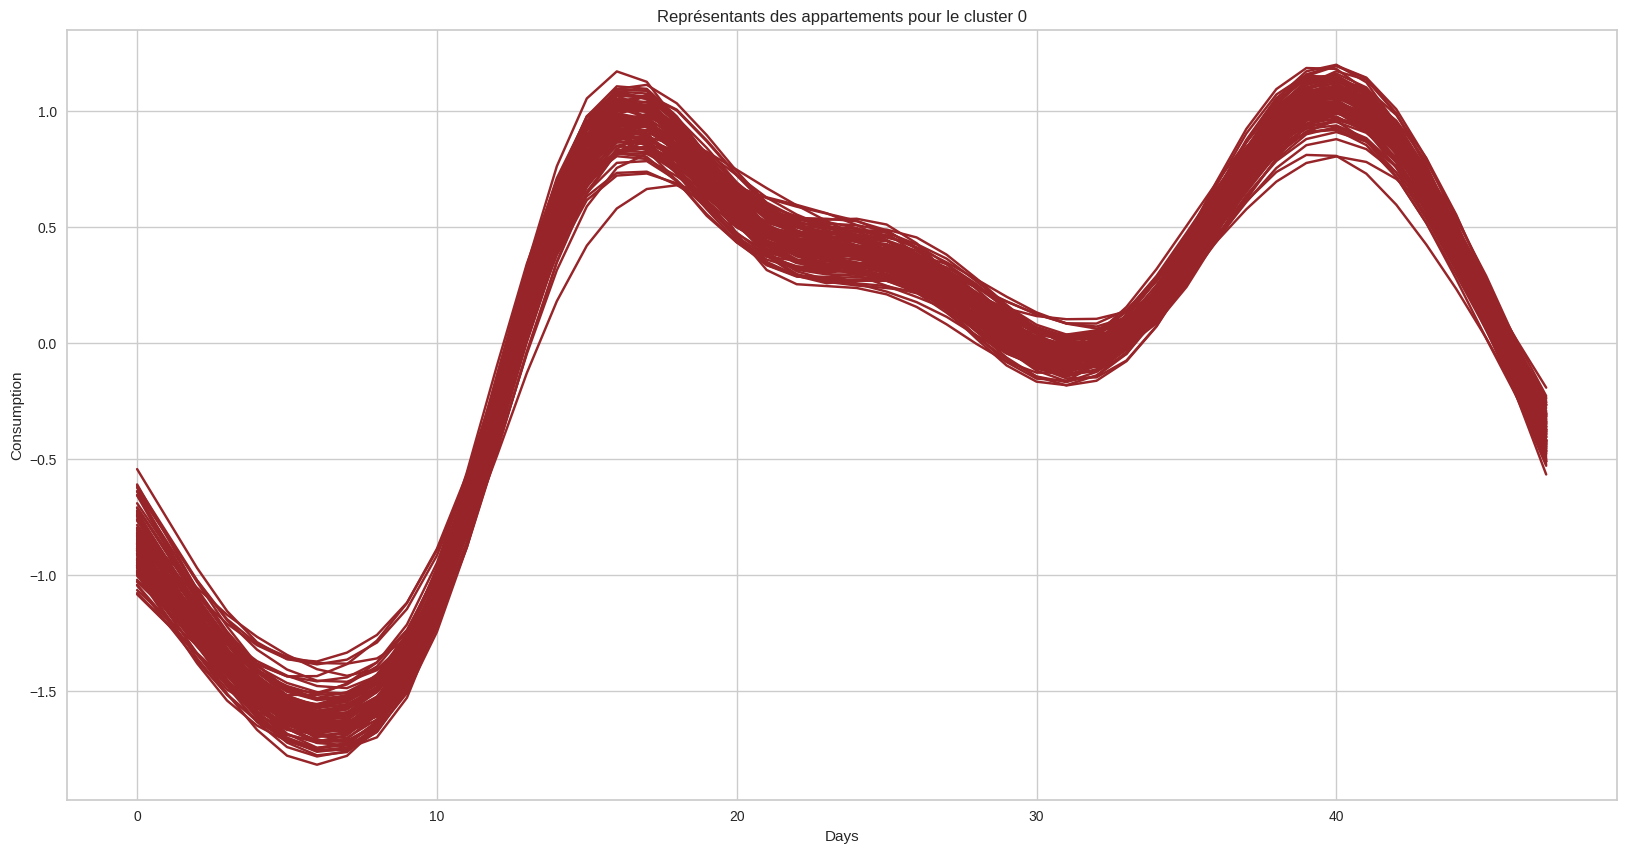

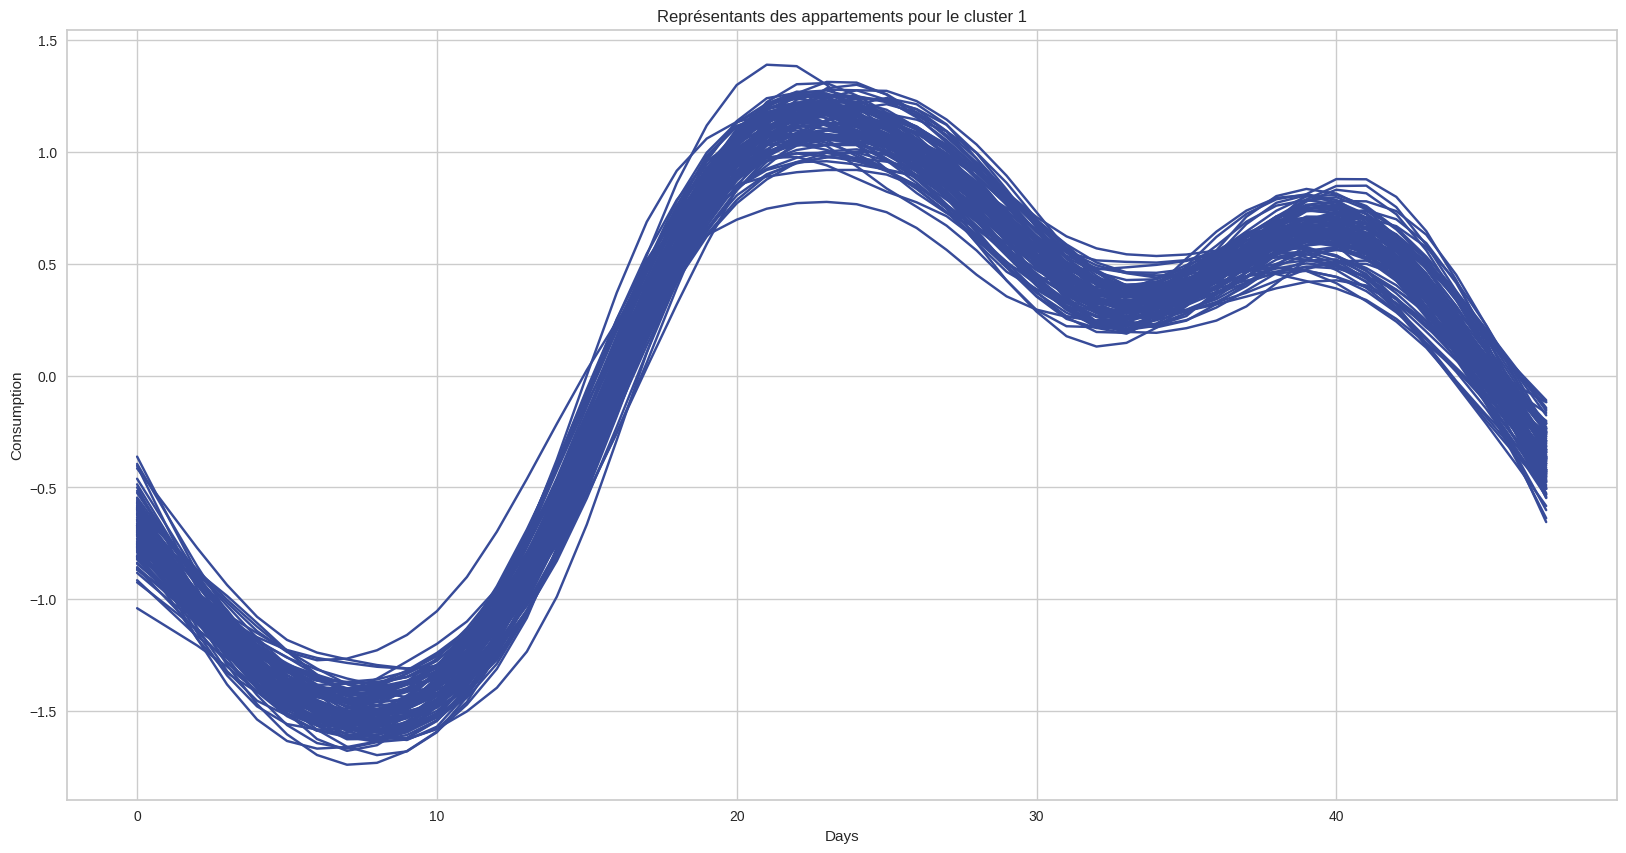

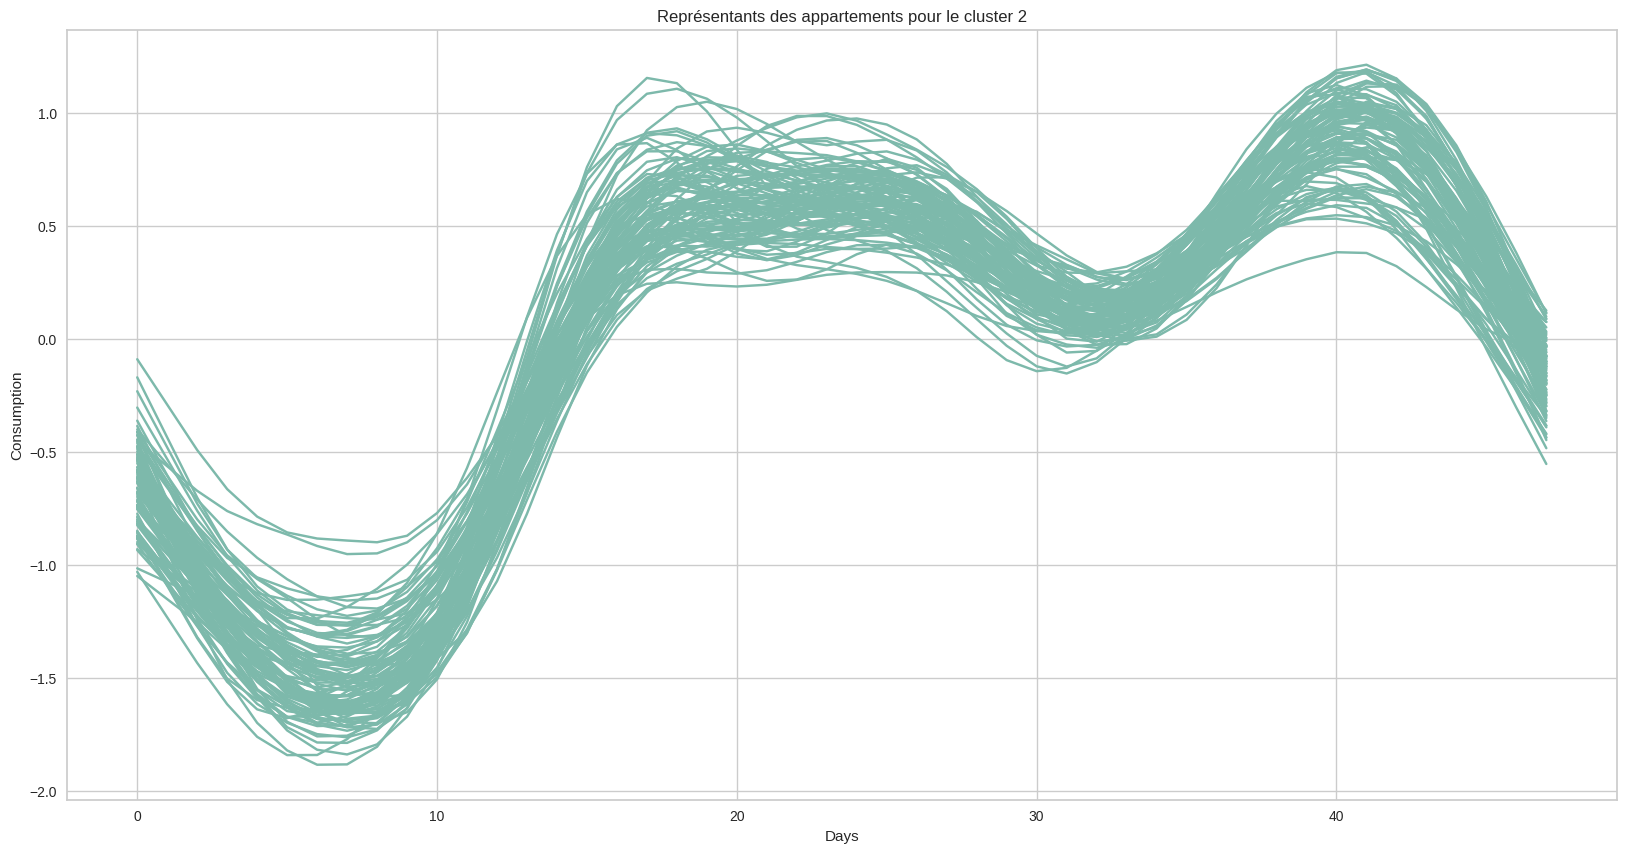

In [70]:
# Fonction pour tracer les représentants des appartements pour chaque cluster sur des graphiques séparés
def plot_representatives_separately(X, APPART, labels, n_clusters):
    colors = ['#962428', '#374b99', '#7db9ab', '#f4c542']  # Red, Blue, Green, Yellow

    for cluster in range(n_clusters):
        plt.figure(figsize=(20, 10))
        for appart in APPART[0].unique():
            X_appart = X.loc[APPART[APPART[0] == appart].index]
            X_appart_cluster = X_appart[labels == cluster]
            cluster_mean = X_appart_cluster.mean()
            plt.plot(cluster_mean, label=f'Appartement {appart}', color=colors[cluster % len(colors)])
        
        plt.xlabel('Days')
        plt.ylabel('Consumption')
        plt.title(f'Représentants des appartements pour le cluster {cluster}')
        #plt.legend()
        plt.show()

# Tracer les représentants des appartements pour chaque cluster sur des graphiques séparés
plot_representatives_separately(X, APPART, cah.labels_, n_clusters=3)